# Nama : Ahmad Jalu Fahreza Nur Hakim
# NIM  : H071201057

# CLUSTERING

## 1. Read Data Set

Informasi Atribut : Integer, Real
1. Product_Code
2. 52 weeks: W0, W1, ..., W51.
3. Normalised vlaues of weekly data: Normalised 0, Normalised 1, ..., Normalised 51

Reference :
James Tan, jamestansc '@' suss.edu.sg, Singapore University of Social Sciences

### 1.1 Import Library


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### 1.2 Menampilkan Data Set

In [32]:
df = pd.read_csv('Data/Sales_Transactions_Dataset_Weekly.csv')
df.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [33]:
#Mengambil semua kolom w1 - w51
X = df.iloc[:, 1:53]
X.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9


In [34]:
X.describe()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,...,8.394575,8.318126,8.434032,8.556104,8.720099,8.670777,8.674476,8.895191,8.861899,8.889026
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,...,11.348777,11.250455,11.223499,11.382041,11.621684,11.435870,11.222996,10.941375,10.492710,9.558011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000
75%,12.000000,12.000000,12.000000,13.000000,13.000000,12.500000,13.000000,12.500000,13.000000,13.000000,...,10.000000,11.000000,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,13.000000,14.000000
max,54.000000,53.000000,56.000000,59.000000,61.000000,52.000000,56.000000,62.000000,63.000000,52.000000,...,52.000000,50.000000,46.000000,46.000000,55.000000,49.000000,50.000000,52.000000,57.000000,73.000000


## 2. Featur Scaling

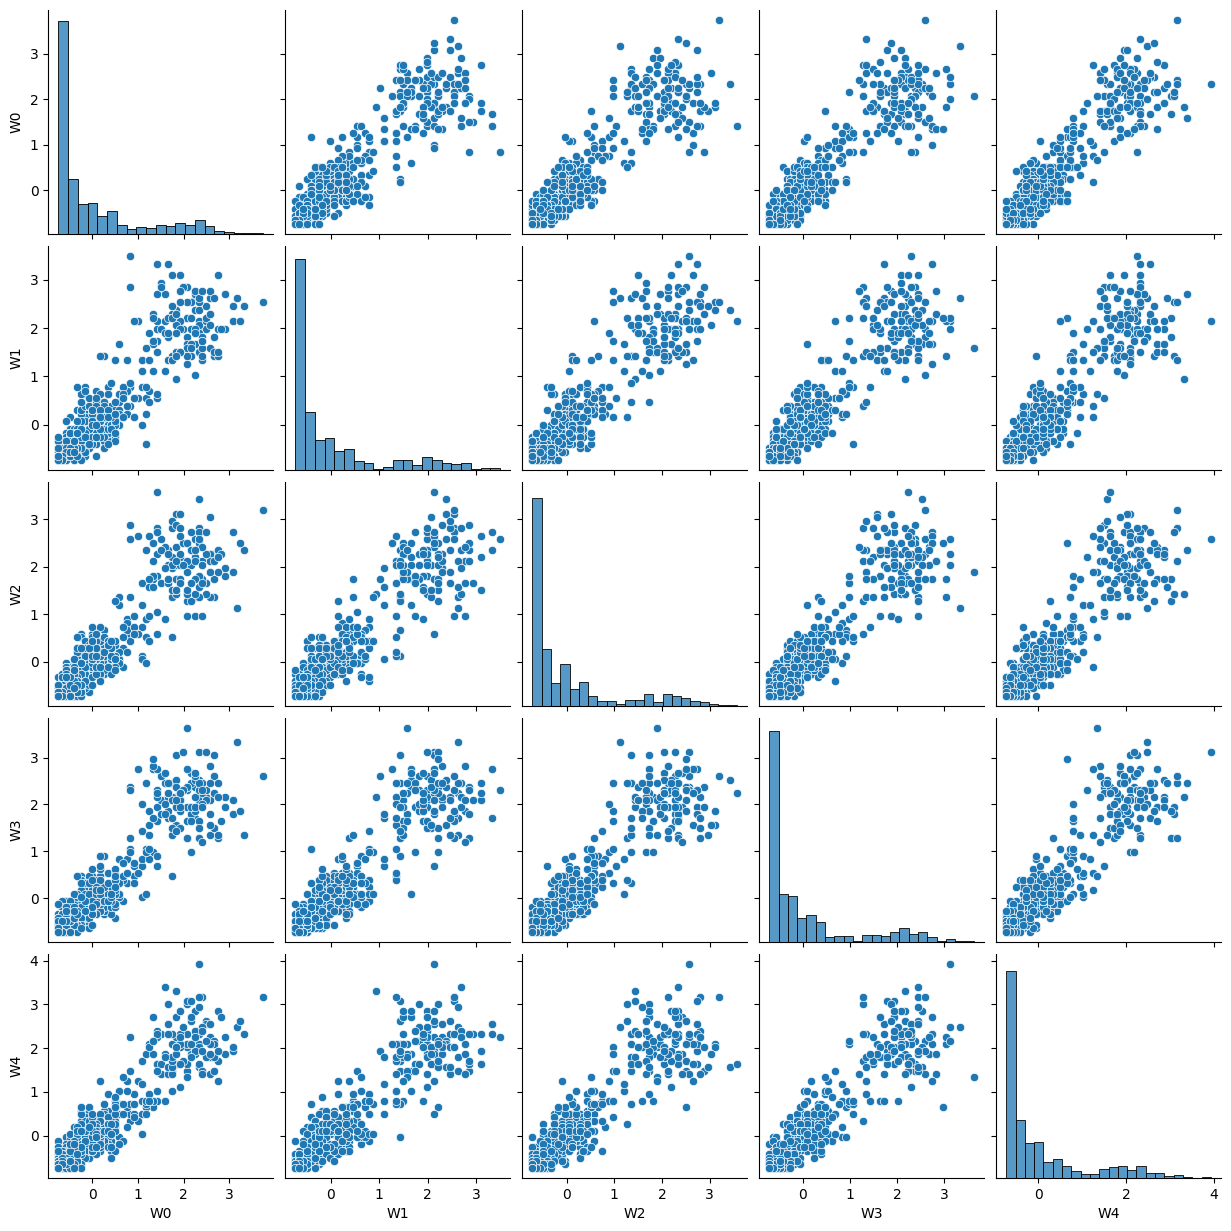

In [35]:
# Feature Scaling
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X))
scaled_X.columns = X.columns

# Data Visualization
_ = sns.pairplot(scaled_X.iloc[:,0:5])

## 3. Metode K-Means

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

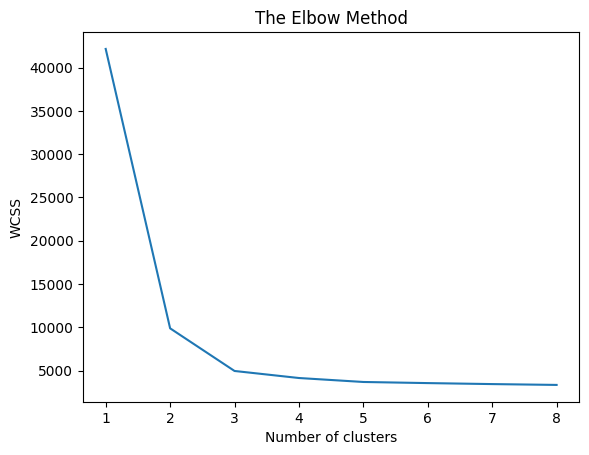

In [36]:
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


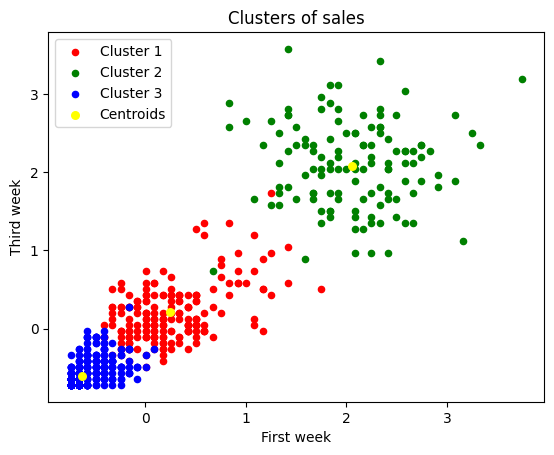

In [38]:
plt.scatter(scaled_X[y_kmeans == 0]['W0'], scaled_X[y_kmeans == 0]['W2'], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_X[y_kmeans == 1]['W0'], scaled_X[y_kmeans == 1]['W2'], s = 20, c = 'green', label = 'Cluster 2')
plt.scatter(scaled_X[y_kmeans == 2]['W0'], scaled_X[y_kmeans == 2]['W2'], s = 20, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('First week')
plt.ylabel('Third week')
plt.legend()
plt.show()

## KESIMPULAN
  Pada teknik Feature Scaling, dilakukan normalisasi data dengan menggunakan Standard Scaler untuk mengubah skala data agar memiliki nilai yang sama. Hasil scaling kemudian diplot dalam bentuk pairplot untuk mengevaluasi hubungan antara variabel yang ada.

  Pada teknik Metode K-Means, dilakukan perhitungan dalam menentukan jumlah cluster optimal dengan menggunakan metode Elbow, yang memplotkan nilai WCSS (Within-Cluster-Sum-of-Squares) pada setiap jumlah cluster. Setelah jumlah cluster ditentukan, dilakukan clustering pada data yang telah di-scaling dengan memplotkan data pada grafik 2D, dengan setiap cluster memiliki warna yang berbeda dan pusat cluster ditandai dengan titik kuning.

  Dari kedua teknik tersebut, kita dapat menentukan bagaimana data sales tersegmentasi dan membantu dalam mengambil keputusan yang lebih baik terkait strategi penjualan.